In [18]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Step 2: Load the dataset
fridge_data = pd.read_csv('My_data_fridge_EXP.csv')

# Step 3: Create Power_final column (This is a placeholder, modify this as needed)
# Assuming Power_final depends on InTemp, Temp_outside, and GES(inKWh)
# Modify the formula based on the actual relationship you expect
fridge_data['Power_final'] = fridge_data['InTemp'] * 0.5 + fridge_data['Temp_outside'] * 0.3 + fridge_data['GES(inKWh)'] * 0.2

# Step 4: Preprocess the data
# Convert categorical variables to numeric
fridge_data['DoorState'] = fridge_data['DoorState'].map({'OPEN': 1, 'CLOSED': 0})
fridge_data['Power'] = fridge_data['Power'].map({'ON': 1, 'OFF': 0})

# Step 5: Define features (excluding 'Power_final' since it's the target)
features = fridge_data[['InTemp', 'InHumid', 'DoorState', 'Power', 'Temp_outside', 'GES(inKWh)']]
labels = fridge_data['Power_final']  # This is what we're predicting

# Step 6: Normalize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Step 8: Build and train the ANN model
model = Sequential()

# Input layer and first hidden layer with 64 neurons
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Output layer with 1 neuron (since we're predicting a continuous value)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Step 9: Predict Power_final on the entire dataset
predictions = model.predict(features_scaled)

# Step 10: Add predicted Power_final to the dataset
fridge_data['Predicted_Power_final'] = predictions

# Step 11: Convert 'TIME' column to datetime format if it's not already
fridge_data['TIME'] = pd.to_datetime(fridge_data['TIME'])

# Step 12: Group by minute and calculate average Power_final for each minute
# We will use 'TIME' as the index to group by minute and then aggregate the data
fridge_data.set_index('TIME', inplace=True)
minute_data = fridge_data.resample('T').agg({'Predicted_Power_final': 'mean'}).reset_index()

# Step 13: Prepare the final output with Time and Predicted Power_final for each minute
output = minute_data[['TIME', 'Predicted_Power_final']]

# Step 14: Save the results to a new CSV file
output.to_csv('predicted_power_usage_per_minute.csv', index=False)

print("Predicted Power_final per minute saved to 'predicted_power_usage_per_minute.csv'")


Epoch 1/50


c:\Users\yamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2818/2818 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 15.7233
Epoch 2/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 3.9063e-04
Epoch 3/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.6748e-04
Epoch 4/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.1987e-04
Epoch 5/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.1982e-04
Epoch 6/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.9184e-04
Epoch 7/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.2481e-04
Epoch 8/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.5203e-04
Epoch 9/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.5420e-04
Epoch 10/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.4190e-04
Epoch 11/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.0842e-04
Epoch 12/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5739e-04
Epoch 13/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.1043e-04
Epoch 14/50
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss

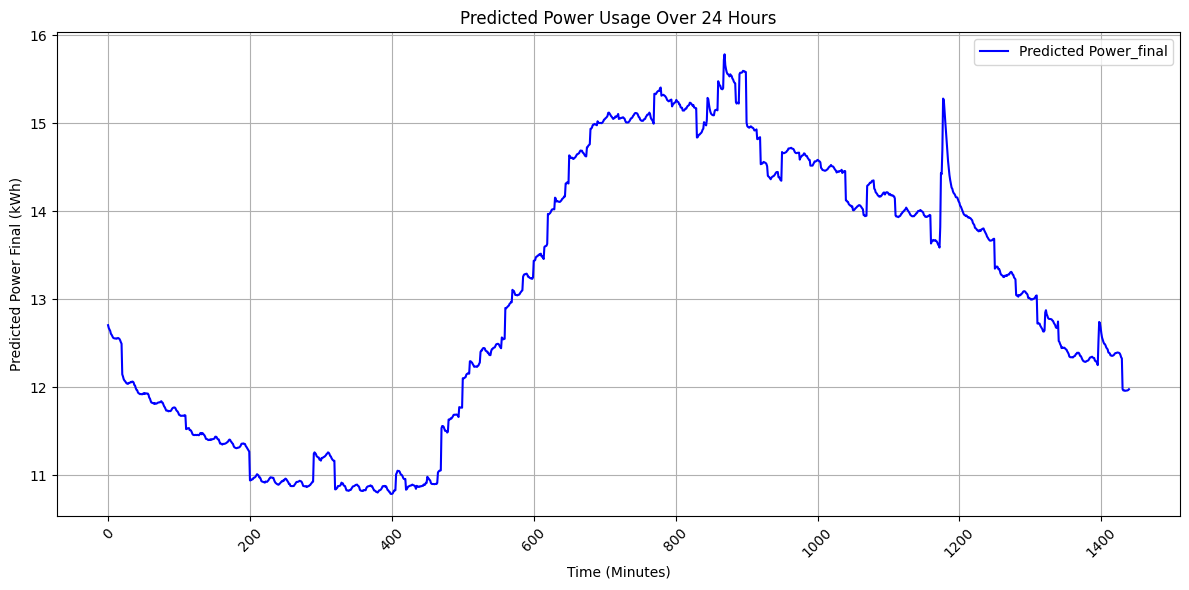

In [19]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Load the predicted data
output = pd.read_csv('predicted_power_usage_per_minute.csv')

# Step 3: Convert the TIME column to datetime and extract the time in minutes or seconds
output['TIME'] = pd.to_datetime(output['TIME']).dt.hour * 60 + pd.to_datetime(output['TIME']).dt.minute  # Time in minutes

# Step 4: Plot the predicted Power_final for each minute over 24 hours
plt.figure(figsize=(12, 6))
plt.plot(output['TIME'], output['Predicted_Power_final'], color='blue', label='Predicted Power_final')

# Step 5: Customize the plot
plt.title('Predicted Power Usage Over 24 Hours')
plt.xlabel('Time (Minutes)')
plt.ylabel('Predicted Power Final (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Step 6: Show the plot
plt.legend()
plt.show()
